# Support Vector Machine

## Imports

In [2]:
import numpy as np
import pandas as pd
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## Datengrundlage

In [3]:
data = np.random.normal(0,1,size=(1000,2))
target = np.where((data[:,:1])**2+(data[:,1:])**2>2,0,1)

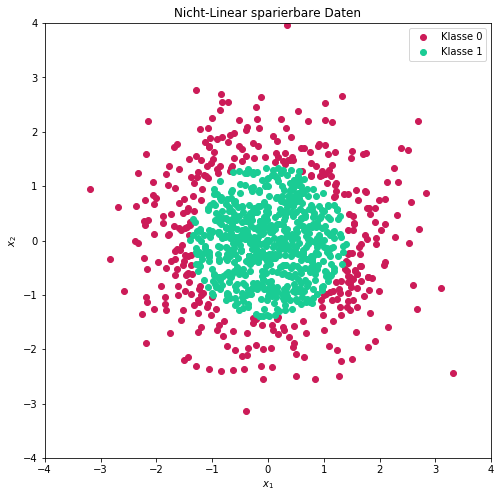

In [4]:
plt.figure(figsize=(8,8))
#plt.scatter(data[:,:1],data[:,1:],c=target)
plt.scatter(data[np.where(target==0),:1],data[np.where(target==0),1:],c="#CC1B58",label="Klasse 0")
plt.scatter(data[np.where(target==1),:1],data[np.where(target==1),1:],c="#1ACC94",label="Klasse 1")
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.title("Nicht-Linear sparierbare Daten")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

## Daten in eine höhere Dimension transformieren

In [5]:
transformed = np.concatenate([data,data[:,:1]**2+data[:,1:]**2],axis=1)

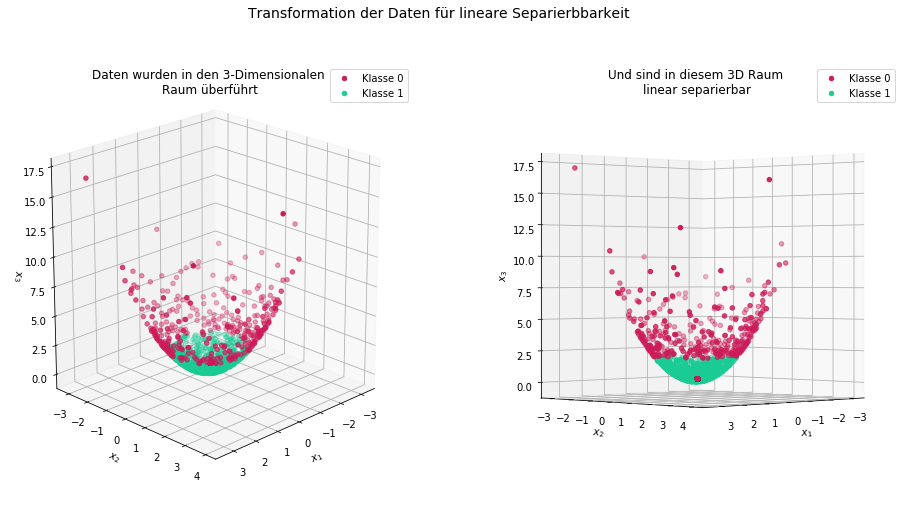

In [6]:
fig = plt.figure(figsize=(16,8))

plt.suptitle("Transformation der Daten für lineare Separierbbarkeit", fontsize=14)
# Erste 3D Ansicht
ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter(transformed[np.where(target==0),:1],transformed[np.where(target==0),1:2],transformed[np.where(target==0),2:],c="#CC1B58",label="Klasse 0")
ax.scatter(transformed[np.where(target==1),:1],transformed[np.where(target==1),1:2],transformed[np.where(target==1),2:],c="#1ACC94",label="Klasse 1")
ax.set_title("Daten wurden in den 3-Dimensionalen \nRaum überführt")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
ax.view_init(elev=20., azim=45)
ax.legend()

# Zweite 3D Ansicht
ax = fig.add_subplot(1,2,2,projection='3d')
ax.scatter(transformed[np.where(target==0),:1],transformed[np.where(target==0),1:2],transformed[np.where(target==0),2:],c="#CC1B58",label="Klasse 0")
ax.scatter(transformed[np.where(target==1),:1],transformed[np.where(target==1),1:2],transformed[np.where(target==1),2:],c="#1ACC94",label="Klasse 1")
ax.set_title("Und sind in diesem 3D Raum \nlinear separierbar")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
ax.view_init(elev=0., azim=45)
ax.legend()

plt.show()

## Die fetteste Trennlinie

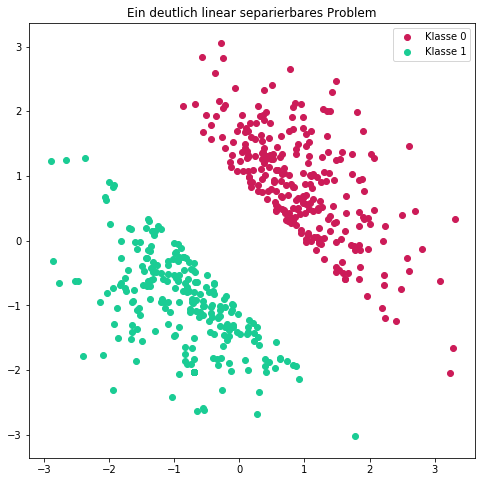

In [15]:
x = np.random.normal(0,1,size=(1000,2))
x = np.where(np.logical_or(x[:,:1]+x[:,1:]>1,x[:,:1]+x[:,1:]<-1),x,np.nan)
x = x[~np.isnan(x).any(axis=1)]
target = np.where(x[:,:1]+x[:,1:]>1,0,1)

plt.figure(figsize=(8,8))
plt.scatter(x[np.where(target==0),:1],x[np.where(target==0),1:],c="#CC1B58",label="Klasse 0")
plt.scatter(x[np.where(target==1),:1],x[np.where(target==1),1:],c="#1ACC94",label="Klasse 1")
plt.title("Ein deutlich linear separierbares Problem")
plt.legend()
plt.show()

In [12]:
def class_line(model):
    x1_axis = np.linspace(-3,3)
    x2_axis = np.linspace(-3,3)
    z = []

    for x1i in x1_axis:
        for x2i in x2_axis:
            l = model.predict(np.array([x1i,x2i]).reshape(1, -1))
            z.append(l)
            
    return np.array(z).reshape(50,50)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


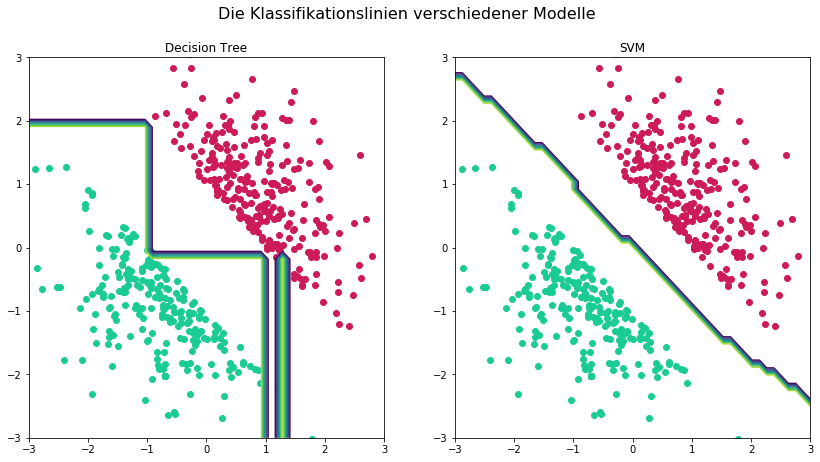

In [20]:
tree = DecisionTreeClassifier()
tree.fit(x,target)

svm = SVC()
svm.fit(x,target)


fig = plt.figure(figsize=(14,7))
fig.suptitle("Die Klassifikationslinien verschiedener Modelle", fontsize=16)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_title("Decision Tree")
ax1.scatter(x[np.where(target==0),:1],x[np.where(target==0),1:],c="#CC1B58",label="Klasse 0")
ax1.scatter(x[np.where(target==1),:1],x[np.where(target==1),1:],c="#1ACC94",label="Klasse 1")
ax1.contour(np.linspace(-3,3), np.linspace(-3,3), class_line(tree))
ax1.set_xlim(-3,3)
ax1.set_ylim(-3,3)

ax2.set_title("SVM")
ax2.scatter(x[np.where(target==0),:1],x[np.where(target==0),1:],c="#CC1B58",label="Klasse 0")
ax2.scatter(x[np.where(target==1),:1],x[np.where(target==1),1:],c="#1ACC94",label="Klasse 1")
ax2.contour(np.linspace(-3,3),np.linspace(-3,3), class_line(svm))
ax2.set_xlim(-3,3)
ax2.set_ylim(-3,3)

plt.show()


In [ ]:
np.random.normal(0,1,size=(200,2))